In [8]:
from matplotlib import pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import *
from tensorflow.keras.activations import *
from tensorflow.keras.datasets import *
from tensorflow.keras.metrics import *
from tensorflow.keras.optimizers import *
from tensorflow.keras.losses import *
from tensorflow.keras.layers import *

In [9]:
def create_model():
    model = Sequential()
    model.add(Dense(1024, activation=relu, input_dim=32*32*3))
    model.add(Dropout(0.25))
    model.add(Dense(512, activation=relu))
    model.add(Dropout(0.25))
    model.add(Dense(256, activation=relu))
    model.add(Dropout(0.2))
    model.add(Dense(128, activation=relu))
    model.add(Dropout(0.1))
    model.add(Dense(64, activation=relu))
    model.add(Dropout(0.1))
    model.add(Dense(10, activation=softmax))

    model.compile(optimizer=Adam(),
                  loss=categorical_crossentropy,
                  metrics=[categorical_accuracy])

    return model


In [10]:
if __name__ == "__main__":
    (x_train, y_train), (x_val, y_val) = cifar10.load_data()

    print("Before reshaping ...")

    print(x_train.shape)
    print(y_val.shape)

Before reshaping ...
(50000, 32, 32, 3)
(10000, 1)


In [11]:
y_train = tf.compat.v1.keras.utils.to_categorical(y_train)
y_val = tf.compat.v1.keras.utils.to_categorical(y_val)

x_train = np.reshape(x_train, (-1, 32 * 32 * 3)) / 255.0
x_val = np.reshape(x_val, (-1, 32 * 32 * 3)) / 255.0

print(x_train)
print("After reshaping ...")

print(x_train.shape)
print(x_val.shape)


[[0.23137255 0.24313725 0.24705882 ... 0.48235294 0.36078431 0.28235294]
 [0.60392157 0.69411765 0.73333333 ... 0.56078431 0.52156863 0.56470588]
 [1.         1.         1.         ... 0.31372549 0.3372549  0.32941176]
 ...
 [0.1372549  0.69803922 0.92156863 ... 0.04705882 0.12156863 0.19607843]
 [0.74117647 0.82745098 0.94117647 ... 0.76470588 0.74509804 0.67058824]
 [0.89803922 0.89803922 0.9372549  ... 0.63921569 0.63921569 0.63137255]]
After reshaping ...
(50000, 3072)
(10000, 3072)


In [12]:
m = create_model()
print(m.summary())

history = m.fit(x_train, y_train,
                validation_data=(x_val, y_val),
                epochs=200,
                batch_size=64)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 1024)              3146752   
_________________________________________________________________
dropout_5 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 512)               524800    
_________________________________________________________________
dropout_6 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 256)               131328    
_________________________________________________________________
dropout_7 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 128)              

50000/50000 [==============================] - 4s 85us/sample - loss: 1.6219 - categorical_accuracy: 0.4205 - val_loss: 1.5469 - val_categorical_accuracy: 0.4532
Epoch 38/200
50000/50000 [==============================] - 4s 83us/sample - loss: 1.6214 - categorical_accuracy: 0.4173 - val_loss: 1.5666 - val_categorical_accuracy: 0.4431
Epoch 39/200
50000/50000 [==============================] - 4s 84us/sample - loss: 1.6144 - categorical_accuracy: 0.4185 - val_loss: 1.5573 - val_categorical_accuracy: 0.4445
Epoch 40/200
50000/50000 [==============================] - 4s 82us/sample - loss: 1.6099 - categorical_accuracy: 0.4216 - val_loss: 1.5531 - val_categorical_accuracy: 0.4525
Epoch 41/200
50000/50000 [==============================] - 4s 83us/sample - loss: 1.6071 - categorical_accuracy: 0.4222 - val_loss: 1.5642 - val_categorical_accuracy: 0.4483
Epoch 42/200
50000/50000 [==============================] - 4s 84us/sample - loss: 1.6083 - categorical_accuracy: 0.4212 - val_loss: 1.537

Epoch 84/200
50000/50000 [==============================] - 4s 87us/sample - loss: 1.5457 - categorical_accuracy: 0.4511 - val_loss: 1.5064 - val_categorical_accuracy: 0.4646
Epoch 85/200
50000/50000 [==============================] - 4s 87us/sample - loss: 1.5425 - categorical_accuracy: 0.4489 - val_loss: 1.4907 - val_categorical_accuracy: 0.4678
Epoch 86/200
50000/50000 [==============================] - 4s 87us/sample - loss: 1.5444 - categorical_accuracy: 0.4504 - val_loss: 1.5487 - val_categorical_accuracy: 0.4459
Epoch 87/200
50000/50000 [==============================] - 4s 87us/sample - loss: 1.5408 - categorical_accuracy: 0.4509 - val_loss: 1.5141 - val_categorical_accuracy: 0.4595
Epoch 88/200
50000/50000 [==============================] - 4s 82us/sample - loss: 1.5384 - categorical_accuracy: 0.4503 - val_loss: 1.5647 - val_categorical_accuracy: 0.4503
Epoch 89/200
50000/50000 [==============================] - 4s 88us/sample - loss: 1.5434 - categorical_accuracy: 0.4471 - va

50000/50000 [==============================] - 4s 86us/sample - loss: 1.5010 - categorical_accuracy: 0.4679 - val_loss: 1.4789 - val_categorical_accuracy: 0.4794
Epoch 131/200
50000/50000 [==============================] - 4s 81us/sample - loss: 1.5033 - categorical_accuracy: 0.4659 - val_loss: 1.4775 - val_categorical_accuracy: 0.4867
Epoch 132/200
50000/50000 [==============================] - 4s 82us/sample - loss: 1.5038 - categorical_accuracy: 0.4680 - val_loss: 1.4626 - val_categorical_accuracy: 0.4832
Epoch 133/200
50000/50000 [==============================] - 4s 84us/sample - loss: 1.4978 - categorical_accuracy: 0.4678 - val_loss: 1.4722 - val_categorical_accuracy: 0.4810
Epoch 134/200
50000/50000 [==============================] - 4s 84us/sample - loss: 1.5031 - categorical_accuracy: 0.4663 - val_loss: 1.4891 - val_categorical_accuracy: 0.4744
Epoch 135/200
50000/50000 [==============================] - 4s 85us/sample - loss: 1.4980 - categorical_accuracy: 0.4663 - val_loss: 

50000/50000 [==============================] - 4s 85us/sample - loss: 1.4774 - categorical_accuracy: 0.4779 - val_loss: 1.4663 - val_categorical_accuracy: 0.4838
Epoch 177/200
50000/50000 [==============================] - 4s 84us/sample - loss: 1.4794 - categorical_accuracy: 0.4770 - val_loss: 1.5024 - val_categorical_accuracy: 0.4718
Epoch 178/200
50000/50000 [==============================] - 4s 84us/sample - loss: 1.4752 - categorical_accuracy: 0.4762 - val_loss: 1.4775 - val_categorical_accuracy: 0.4801
Epoch 179/200
50000/50000 [==============================] - 4s 84us/sample - loss: 1.4777 - categorical_accuracy: 0.4768 - val_loss: 1.4964 - val_categorical_accuracy: 0.4731
Epoch 180/200
50000/50000 [==============================] - 4s 83us/sample - loss: 1.4796 - categorical_accuracy: 0.4757 - val_loss: 1.4620 - val_categorical_accuracy: 0.4864
Epoch 181/200
50000/50000 [==============================] - 4s 85us/sample - loss: 1.4803 - categorical_accuracy: 0.4755 - val_loss: 

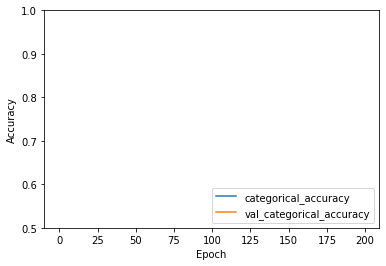

In [13]:
plt.plot(history.history['categorical_accuracy'], label='categorical_accuracy')
plt.plot(history.history['val_categorical_accuracy'], label='val_categorical_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')